<a href="https://colab.research.google.com/github/andrnsgnmez/Primera-Red-Nueronal-Sin-Tensorflow/blob/main/Red_Neuronal_sin_Tensor_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar librerías
import numpy as np  #Libreria para procesamiento numerico
import scipy as cp  #Expande la funcionalidad de Numpy
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles  #make_circles nos funcionara para hacer una nube de puntos no lineal

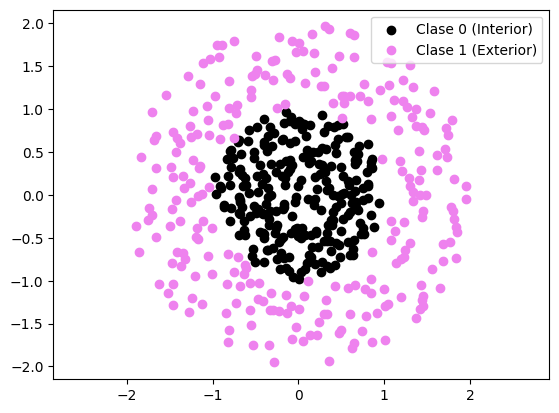

In [10]:
#Sin usar sklearn

import numpy as np
import matplotlib.pyplot as plt

# Número de puntos que deseas generar
n = 250
n1 = 250

# Radio del círculo interior
radius_inner = 1.0

# Radio del círculo exterior
radius_outer = 2.0

# Ángulo entre los puntos
theta_inner = np.linspace(0, 2 * np.pi, n)
theta_outer = np.linspace(0, 2 * np.pi, n1)

# Genera las coordenadas polares de los puntos para cada clase
r_inner = np.sqrt(np.random.uniform(0, radius_inner**2, n))
r_outer = np.sqrt(np.random.uniform(radius_inner**2, radius_outer**2, n1))

# Etiqueta de la clase: 0 para el círculo interior y 1 para el círculo exterior
labels_inner = np.zeros(n)
labels_outer = np.ones(n1)

# Convierte las coordenadas polares a cartesianas para ambas clases
x_inner = r_inner * np.cos(theta_inner)
y_inner = r_inner * np.sin(theta_inner)

x_outer = r_outer * np.cos(theta_outer)
y_outer = r_outer * np.sin(theta_outer)

# Concatena las características y etiquetas de ambas clases
X = np.vstack((np.column_stack((x_inner, y_inner)), np.column_stack((x_outer, y_outer))))
Y = np.hstack((labels_inner, labels_outer))

# Grafica los puntos de ambas clases
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="black", label="Clase 0 (Interior)")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="violet", label="Clase 1 (Exterior)")
plt.axis("equal")
plt.legend()
plt.show()
